In [23]:
import math,os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import zipfile                                   

In [24]:
!gdown --id 16CjsIX4WRP4h5IwXCaHeoJfpgbdT8_yE          #Importing the data set  

Downloading...
From: https://drive.google.com/uc?id=16CjsIX4WRP4h5IwXCaHeoJfpgbdT8_yE
To: /content/iris.zip
100% 1.01k/1.01k [00:00<00:00, 1.68MB/s]


In [25]:
with zipfile.ZipFile("/content/iris.zip","r") as zip_ref:         #Extracting the data
    zip_ref.extractall("/content") 

In [26]:
# Reading the Dataset
iris = pd.read_csv('/content/iris.csv')
iris_feat = iris.iloc[:,:-1]
iris_species = iris.iloc[:,-1]

In [32]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


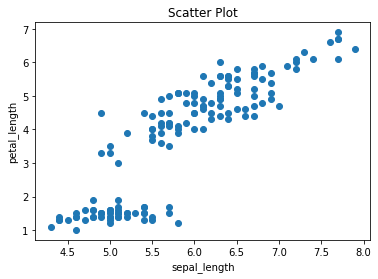

In [27]:
# matplotlib 

plt.scatter(x = iris_feat['sepal_length'],y = [iris_feat['petal_length']],alpha=1)

plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
#Show the plot
plt.show()

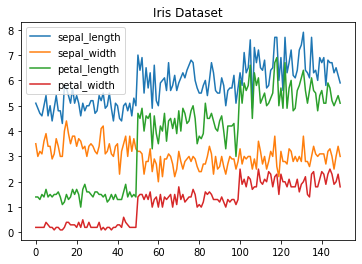

In [28]:

# get columns to plot
columns = iris_feat.columns
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

Text(0, 0.5, 'Frequency')

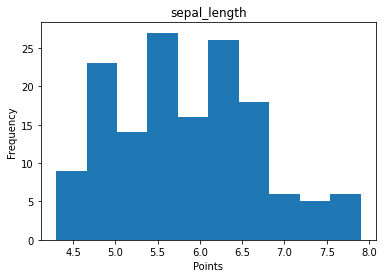

In [29]:
# normal
fig, ax = plt.subplots()
# plot histogram
ax.hist(iris_feat['sepal_length'])
# set title and labels
ax.set_title('sepal_length')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

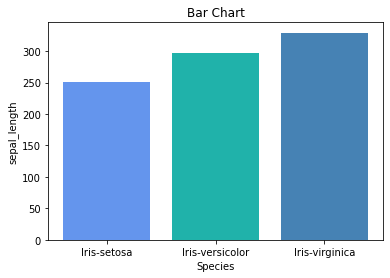

In [31]:
df = iris.groupby('species')['sepal_length'].sum().to_frame().reset_index()

plt.bar(df['species'],df['sepal_length'],color = ['cornflowerblue','lightseagreen','steelblue']) 

plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('sepal_length') 

plt.show()

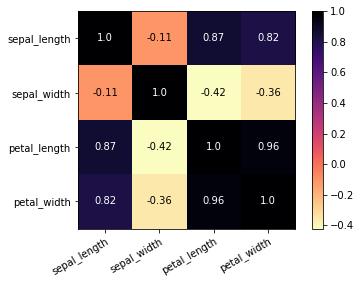

In [22]:
corr = iris.corr()

fig, ax = plt.subplots()
img = ax.imshow(corr.values,cmap = "magma_r")

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
cbar = ax.figure.colorbar(img, ax=ax ,cmap='')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if corr.iloc[i, j]<0:
            text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")
        else:
            text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="white")

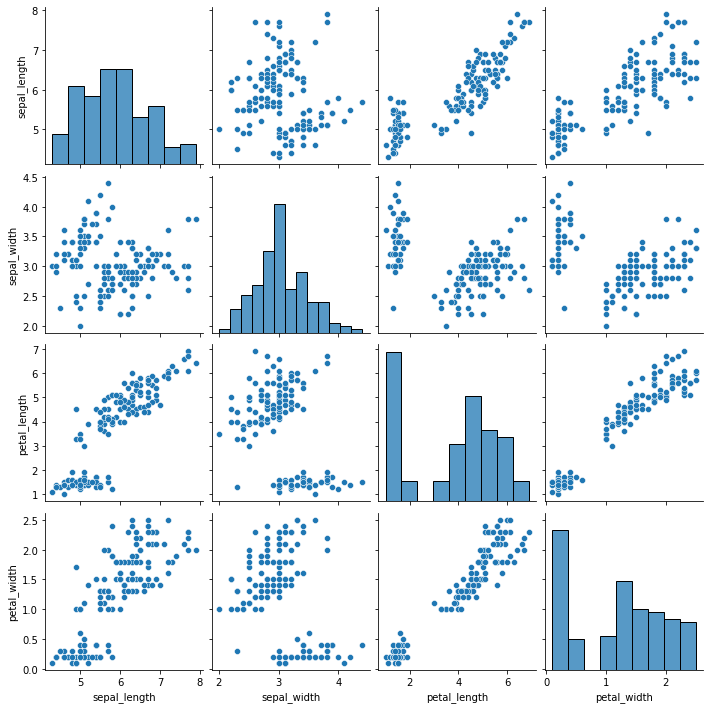

In [18]:
# type-1
sns.pairplot(iris)

In [17]:
import plotly.express as px

fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_length',
              color='species')
fig.show()